In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab1.ipynb")

# EE 120 Lab 1: Python for Signals and Systems

**Signals and Systems** at UC Berkeley

Acknowledgements:

- **Spring 2019** (v1.0): Dominic Carrano, Babak Ayazifar  
- **Fall 2019** (v2.0): Dominic Carrano  
- **Spring 2020** (v3.0): Dominic Carrano
- **Fall 2020** (v3.1): Anmol Parande
- **Fall 2021** (v4.0): Anmol Parande
- **Fall 2022, Spring 2023** (v4.1): Naomi Sagan

In [2]:
# Click on me and hit Shift + Enter!
import numpy as np
import matplotlib.pyplot as plt
import time
import lab1_helper
import IPython.display as ipd
from scipy.io import wavfile
%matplotlib inline

# Jupyter Notebook "Labs"?

We introduced Jupyter Notebook based Python labs — which are essentially coding-based homeworks — to EE 120 in the spring 2019 semester. We've designed these labs to:
1. Demonstrate real-life applications of the content covered in lecture;
2. Cultivate computational literacy by adding NumPy, SciPy and Matplotlib to your toolkit for future industry and research endeavors; and
3. Have a self-contained structure, with all the information necessary to complete the lab inside it, even though most lab topics are not covered in lecture.

Generally, these labs follow a standard format.
- **Background**: Context for what the lab is about, and how it ties into lecture content.
- **Questions**: Coding tasks for you to complete and conceptual questions to answer as you work toward implementing a concrete piece of signals and systems.
- **References**: Various additional sources you may find useful in completing the lab, or that we used to create it.

We've invested a lot of time and effort into making these labs interesting and application-driven and hope that you find them both informative and fun. We welcome and encourage any feedback you have on them — it's an invaluable source of data for us. The versions you're working with this semester are *far* superior to the originals that were deployed in spring 2019 thanks to all the student feedback we've incorporated.

# Submitting The Notebooks

All questions that you're required to complete (mostly coding, some conceptual) have prompts. Some questions are marked as optional, and we do not grade these questions. You will *not* earn extra credit for completing them; they just serve as extra practice and examples.

Some questions will be graded using test cases you have access to in this notebook. Others will be graded using hidden test cases. Yet others will be graded manually. We use the [otter-grader package](https://otter-grader.readthedocs.io/en/latest/) to grade assignments.This should be automatically installed on Datahub.

At the end of every notebook, there will be instructions for how to submit your solutions.

**IMPORTANT**: Make sure none of your code cells have extra `print` statements (except those we ask you to write or write ourselves). This will cause tests to fail.

# Q1: Play That Funky Music

To start off, let's make some music! 

The Western music scale groups *notes*, which are sinusoids at a single frequency (referred to as *pure tones* among engineers), into *octaves* which contain 12 notes: $A, A\#, B, C, C\#, D, D\#, E, F, F\#, G, G\#$. 

Most instruments are capable of playing notes at several different octaves. In the case of a piano, shown below, the octaves are physically concatenated together, with notes further to the right corresponding to higher frequencies.

&nbsp;
 
<img src="figures/piano-layout.jpg" width=800em />

&nbsp;

Sometimes $A\#$ (pronounced "A sharp") is also referred to as $B\flat$ (pronounced "B flat"), and similarly $C\#$ as $D\flat$, and so on, hence the double-labellings on the diagram. We'll stick to the convention of using sharps rather than flats. **The C note under the word "Piano" in the diagram's title is known as *Middle C*, and is a commonly used reference point.**

The frequencies represented by each note are on a logarithmic scale, so that moving to the right by a single note scales the frequency by $2^{1/12}$. There are twelve notes per octave, so moving right by twelve notes **doubles** the frequency, generating a *harmonic* of the fundamental. In this question, we'll explore the connection between signals and combinations of waves. We'll also gain some concrete intuition for what the abstract mathematical properties of (sinusoidal) signals, such as amplitude, frequency, and phase, sound like.

## Q1a: Pure Tones

To start off, we're going to consider notes in the octave containing middle C. We know that moving up one note multiplies the frequency by $2^{1/12}$, so that moving up an octave doubles the frequency, but we also need a start point. We'll use the [A440 pitch standard](https://en.wikipedia.org/wiki/A440_(pitch_standard)) to resolve this dilemma, which says that the "A" note *above* Middle C on an instrument should be tuned to 440 Hz. This means that the "A" note *below* Middle C should be half this, or 220 Hz. 

We can climb up the middle C octave and generate each note's frequency by successive multiplications with $2^{1/12}$; run the cell below which uses this to print out the frequency associated to each note in this octave.

In [3]:
notes = ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"]
middle_octave = [220 * 2 ** (i / 12) for i in range(12)]
for i, note in enumerate(notes):
    print("{0}:\t{1} Hz".format(note, round(middle_octave[i], 2)))

A:	220.0 Hz
A#:	233.08 Hz
B:	246.94 Hz
C:	261.63 Hz
C#:	277.18 Hz
D:	293.66 Hz
D#:	311.13 Hz
E:	329.63 Hz
F:	349.23 Hz
F#:	369.99 Hz
G:	392.0 Hz
G#:	415.3 Hz


To save you some time, we've accumulated these into a dictionary object, `note_freqs`, for you to use. 

If you're unfamiliar with dictionaries, they're similar to lists, except that instead of being indexed by integers from $0$ to $\text{Length of list } - 1$, they can be indexed by almost anything, including strings. For example, `note_freqs["A"]` would return 220. Feel free to make a new cell and play around with it to get comfortable. 

In [4]:
# For Middle C octave
note_freqs = {"A": 220, "A#": 233, "B": 247, "C": 262, "C#": 277, "D": 294, \
              "D#": 311, "E": 330, "F": 349, "F#": 370, "G": 392, "G#": 415}

Mathematically, we represent a note with frequency $f$ as a sine wave at that frequency with some amplitude $A$ and phase $\phi$,

$$A \sin(2\pi f t + \phi),$$

where the amplitude $A$ would be determined by how hard the note on the piano is physically pressed (and correspondingly how loud it sounds) and the phase $\phi$ corresponding to a temporal offset is typically just taken to be zero.

Using this, your job is to implement the `pure_tone_gen` function below according to the docstring. You should use `note_freqs` in your function.

**Note on frequencies (pun intended)**:
- If `octave_offset` is 0, then the frequency of the sine wave is the value found in `note_freqs`.
- If `octave_offset` is 1, then the frequency of the sine wave is the value found in `note_freqs`, doubled.
If it is -1, then you half the frequency.
- How does this extrapolate to larger octave offsets?

**Hint 1:** We want the note to be played for `duration` seconds, and to use `fs` data points per second. This means that we'll need to generate the note over `fs * duration` samples (rounded to the nearest integer) from time zero to time `duration`. Check out [np.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to help you do this.

**Hint 2:** As covered in Lab 0, NumPy is smart about handling both array and scalar inputs to its functions. For example, `np.sin(np.pi / 2)` will return $\sin(\pi / 2)$. However, you can also pass in NumPy arrays and the function will be applied elementwise: `np.sin(np.array([0, np.pi / 2, np.pi, 3 * np.pi / 2]))` will return a numpy array containing $\sin(0), \sin(\pi / 2), \sin(\pi), \sin(3\pi / 2)$. You can take advantage of this to make your implementation a lot simpler, avoiding the need to iterate over the entire array and manually call the function on each element.

**Hint 3:** Think about the definition of a sine wave $A \sin(2\pi f t + \phi)$. Which variables are fixed? Which variables are changing (and therefore require an array)?

In [11]:
def pure_tone_gen(note, fs, duration, amplitude=1, phase=0, octave_offset=0):
    """
    Generate a NumPy array which contains samples of a sine wave representing the note
    "note" for exactly duration seconds with amplitude and phase as given. If the note is outside the middle C octave,
    then octave_offset specifies how many octaves above or below it should be.
    
    Parameters:
    note          - The note to generate. Some element of note_freqs (e.g., "A", "A#", "B", and so on).
    fs            - The sampling frequency, that is, the number of samples to use per second of data generated.
    duration      - The length, in seconds, of the pure tone to generate.
    amplitude     - The amplitude of the note.
    phase         - The phase of the note.
    octave_offset - How many octaves below or above the octave {A, A#, ..., Middle C, ..., G, G#} the desired 
                    note is. For example, setting this parameter to zero and note to "C" would generate Middle C.
    """
    
    time_arr = np.linspace(0, duration,round (fs*duration))
    return amplitude * np.sin(2*np.pi*((2**octave_offset)*note_freqs[note])*time_arr + phase)
    
    
    

We'll test our function in two different ways:
- Listening to the output and verifying that it sounds how we expect it to.
- Comparing the numerical values in the output against the correct arrays.

First, we'll play the octave from A to A containing middle C, playing each note for one second, and make sure things sound okay. This is the better choice for our first mode of debugging because it contains much more information than a binary "Yes/No" about numbers matching up. This is especially true with audio signals, where the output arrays we generate will be very long — trying to manually make sense of hundreds of thousands of sample points would be a pain.

Run the cell below and click the play button to hear how a *correct* output will sound. **Make sure your volume is at an appropriate level before clicking play so you don't hurt your ears.**

In [12]:
ipd.Audio("middle_C_octave.wav")

The code below calls your function for each key in the `note_freqs` dictionary and concatenates them all into a single array. Run the cell below to play your version.

**Warning: if your function is wrong, it's possible that you'll hear some high-pitched sounds that could be very unpleasant to your ears.** We recommend you take off any headphones and set your computer speakers to a low volume while debugging.

In [13]:
fs = 44100
scale = np.concatenate([pure_tone_gen(note, fs, 1) for note in note_freqs.keys()])
ipd.Audio(data=scale, rate=fs)

Once you have that working, run the cell below to play the melody from Queen's *Bohemian Rhapsody*. 

You can [listen to it on YouTube](https://www.youtube.com/watch?v=fJ9rUzIMcZQ) to get a sense for what it should sound like. The part played by the cell below is from 0:50 to 0:56 in the video. It's okay if it sounds a bit robotic rather than like a piano or other instrument; we have an optional extension to fix that later.

In [14]:
melody = []
for i in range(2):
    melody.append(pure_tone_gen("A#", fs, .4) + pure_tone_gen("D", fs, .4))
    melody.append(pure_tone_gen("F", fs, .3, octave_offset=-1))
    melody.append(pure_tone_gen("A#", fs, .35))
    melody.append(pure_tone_gen("D", fs, .35))
    melody.append(pure_tone_gen("G", fs, .8))
    melody.append(pure_tone_gen("F", fs, .8))
    
melody = np.concatenate(melody)
ipd.Audio(data=melody, rate=fs)

Now that your function produces outputs that sound correct, try running some numerical test cases below. If the previous two tests sounded okay, you should pass these two tests.

In [15]:
grader.check("q1a")

q1a results: All test cases passed!

## Q1b: Chords

Now, you have a function to generate pure tones. Pure tones are incredibly useful, as they form the basic building block of music.

We can superimpose pure tones to create *chords*. Dealing with raw pure tones every time we want to play a chord is annoying though. We need something more high-level to work with, so let's write a new function to generate chords for us by superimposing pure tones. Notes in a chord are played at the same time, not one after another: rather than concatenating the note arrays so that the sounds come one after another, we want to **add these note arrays elementwise so they play in unison.**

Implement the function `chord_gen` below which uses `pure_tone_gen` to generate a chord according to the docstring, saving us time in manually generating the chords. **You need a working `pure_tone_gen` to complete this part.**

In [51]:
def chord_gen(notes, fs, duration, amplitudes, phases, octave_offsets):
    """
    Create a chord by superimposing multiple notes.
    
    Parameters:
    notes          - The list of notes to play.
    fs             - A single number for the sampling rate to use for all notes.
    duration       - A single number for the duration of the chord to use.
    amplitudes     - A list of the amplitudes to use.
    phases         - A list of the phases to use.
    octave_offsets - A list of the octave offsets to use.
    
    Hint: There are two possible approaches. You can either allocate a fixed length array of 0s 
            and add each note with iteration, or you can np.vstack and np.sum to reduce all the
            pure tones into a single array (look at the axis argument)
    """
    tones = np.zeros (round(fs*duration))
    for i in range(len(notes)):
        tones+= pure_tone_gen(notes[i],fs,duration, amplitudes[i], phases[i], octave_offsets[i])
    return tones
        

We don't include formal test cases to grade you on this part. Instead, run the cell below to play the chord progression from Maroon 5's *This Love*. The code below will play the first ~10 seconds of the song, available [here](https://www.youtube.com/watch?v=XPpTgCho5ZA) on YouTube. Again, it'll still sound a bit robotic, but that's fine.

In [52]:
pause = np.zeros(30000)

melody = []
melody.append(chord_gen(["B", "B"], fs, .3, [1.5, 1.5], [0, 0], [-1, 0]))
melody.append(pause)
melody.append(chord_gen(["B", "B"], fs, .3, [1.5, 1.5], [0, 0], [-1, 0]))
melody.append(chord_gen(["D", "D"], fs, .3, [1.5, 1.5], [0, 0], [-1, 0]))
melody.append(chord_gen(["C", "C"], fs, .3, [1.5, 1.5], [0, 0], [-1, 0]))
melody.append(pause)
melody.append(chord_gen(["G", "G"], fs, .3, [1.5, 1.5], [0, 0], [-1, 0]))
melody.append(chord_gen(["F#", "F#"], fs, .3, [1.5, 1.5], [0, 0], [-1, 0]))
melody.append(chord_gen(["F", "F"], fs, .3, [1.5, 1.5], [0, 0], [-1, 0]))
melody.append(pause)
melody.append(chord_gen(["F", "F"], fs, .3, [1.5, 1.5], [0, 0], [-1, 0]))
melody.append(chord_gen(["D#", "D#"], fs, .3, [1.5, 1.5], [0, 0], [-1, 0]))
melody.append(chord_gen(["D", "D"], fs, .3, [1.5, 1.5], [0, 0], [-1, 0]))

ipd.Audio(data=np.concatenate(melody), rate=fs)

In [53]:
grader.check("q1b")

q1b results: All test cases passed!

## Q1c: It's Just a Phase

**Please do this question in a quiet area with the volume at an appropriate level so you can hear everything.**

We've seen that a pure tone at frequency $f$ is represented as

$$A \sin(2\pi f t + \phi)$$

where $A$ is the amplitude and $\phi$ is the phase. A large portion of this class is dedicated to decomposing signals in terms of pure tones (represented as complex exponentials rather than sines and cosines, although the two are equivalent through Euler's formula), so it's good to get acquainted with them now. 

A generous estimate of the typical human hearing range is 20 Hz to 20 kHz. For a given frequency $f$ inside the audible spectrum, we have two parameters we can vary for our pure tone: its amplitude, and its phase. A natural question to ask, then, is which our ear can distinguish better — amplitude or phase?

<!-- BEGIN QUESTION -->

### Q1c(i) Amplitude

First, let's take a look at amplitude. A negative amplitude is equivalent to a positive one with a phase shift of $\pi$ (since $\sin(\theta - \pi) = -\sin(\theta)$), so we can restrict ourselves to the case when $A \geq 0$. Let's listen to a few different amplitude settings.

In [54]:
pause = np.zeros(int(fs * 0.5))

volume_progression = np.concatenate([np.hstack((pure_tone_gen("C", fs, duration=1.5, amplitude=ampl), pause))
                                     for ampl in np.linspace(0, 1, 11)])
ipd.Audio(data=volume_progression, rate=fs)

**Q:** How many of the different amplitude settings could you tell apart? Did they all sound the same? Or, at the other extreme, could you tell almost all of them apart? A rough estimate is fine.

By "tell apart", we mean the **volume level should be distinct**, not that the music sounds fundamentally different.

<span style="color:blue">**A:** I think every music sounds are distinct as the amplitude settings are increasing.  </span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q1c(ii)Phase

Now, let's try the phase. We did 11 different amplitude settings, so let's do 11 different phase settings. While the amplitude can be any real number (theoretically, at least — we don't want to blow out our speakers or eardrums!), phase always wraps around every $2\pi$, so we'll pick 11 uniformly spaced values from this range.

In [55]:
pause = np.zeros(int(fs * 0.5))

volume_progression = np.concatenate([np.hstack((pure_tone_gen("C", fs, duration=1.5, amplitude=1, phase=phase), pause))
                                     for phase in np.linspace(0, 2 * np.pi, 11)])
ipd.Audio(data=volume_progression, rate=fs)

#### (Problem 1(c)(ii): Phase)

**Q:** How many of the different phase settings could you tell apart? Did they all sound the same? Or, at the other extreme, could you tell almost all of them apart? A rough estimate is fine.

<span style="color:blue">**A:** They all sounded the same to me </span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q1c(iii): Amplitude vs. Phase

**Q:** Based on the experiments you just performed, which do you conclude that the human ear is more sensitive to: amplitude, or phase?

**Note**: If all settings sounded the same for _both_ amplitude and phase, then try using headphones or an external speaker (or turn up your volume).

<span style="color:blue">**A:** Human ear is more sensitive to amplitude </span>

<!-- END QUESTION -->

## (Optional) Q1d: Pushing the Envelope

So far, all the music we've made has sounded robotic. In this part, we'll fix that and make our notes sound like they're coming from an actual instrument! 

The issue is that our model of notes as pure tones is too idealistic — instruments don't produce exact sinusoids at a single frequency with constant amplitude. There are two main differences between our pure tones and how instruments actually work (or at least what most models of them assume):
1. **Overtones**. When you play Middle C, you don't just get Middle C. You also get several higher frequencies added in that give instruments a "richer" sound than what we've heard so far in this question. These are known as *overtones*. Most instruments are finely tuned so that the only overtones included are the harmonics (integer multiples of the frequency of the note played). So, rather than generating the "A" directly below Middle C as a 220 Hz sound, we should also be including the next several harmonics at 440 Hz, 880 Hz, and so on, with the amplitudes dying out as the frequency increases (otherwise, the high-pitched sounds would be unpleasant).
2. **Attack and Release Time**. All our notes have been designed to instantly switch between off and on so far: we instantly play the sinusoid at full power as soon as it starts, and then immediately stop it at the end. In actual instruments, there's some delay between the note starting and reaching full volume, known as *attack time*, and then again after it hits a sustained level before the sound completely fades away, called *release time*. The actual times themselves depend on the physical characteristics of the instrument.

You probably have an idea how we could handle (1) — just make a "chord" from harmonics of a note every time we want to play it by using our `chord_gen` function, feeding in an array of amplitudes that drops off toward zero for the higher harmonics. The number of harmonics to include, and the rate at which to have the amplitudes drop off depend on the specific instrument being simulated. Generally, more harmonics produces a more "full" and organ-like sound.

Taking care of (2) is a bit more complicated, however. One of the key developments in electronic music was the invention of the **ADSR Envelope**, which accounts for the non-instant rise and fall times of real instruments. The acronym stands for Attack, Decay, Sustain, and Release, and is shown below (image source: Wikipedia).

<img src="figures/ADSR.png" style="width:30em">

After constructing an ADSR envelope, call it $w(n)$, we modulate our music signal $x(n)$ with it to produce the signal $y(n) = w(n)x(n)$, which attenuates the sinusoid as appropriate. Again, picking the specific parameters depends on the instrument you want to mimic. To get a feel for what this looks like, run the cell below.

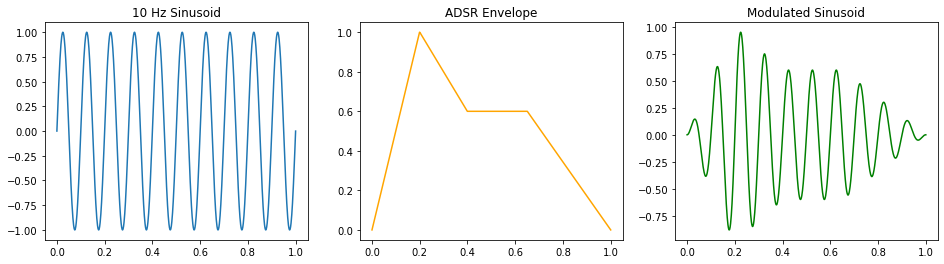

In [56]:
def adsr_envelope(a_pct, d_pct, s_level, r_pct, n):
    # Number of samples for each section
    a_samples = int(a_pct * n)
    d_samples = int(d_pct * n)
    r_samples = int(r_pct * n)
    s_samples = n - (a_samples + d_samples + r_samples)
    
    # Compute each section and combine to form envelope
    a = np.linspace(0, 1, a_samples)
    d = np.linspace(1, s_level, d_samples)
    s = s_level * np.ones(s_samples)
    r = np.linspace(s_level, 0, r_samples)
    return np.concatenate((a,d,s,r))

# 20% attack time, 20% decay time, 35% release time; decay level of .6
t = np.linspace(0, 1, 1000)
f = 10

x = np.sin(2 * np.pi * f * t)
w = adsr_envelope(.2, .2, .6, .35, len(x))
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.plot(t, x)
plt.title("{} Hz Sinusoid".format(f))
plt.subplot(1, 3, 2)
plt.plot(t, w, color="orange")
plt.title("ADSR Envelope")
plt.subplot(1, 3, 3)
plt.plot(t, x * w, color="green")
plt.title("Modulated Sinusoid")
plt.show()

You can also try playing around with an exponential envelope, which only has attack time (rising from zero to a peak) and decay time (dropping off to zero), with no sustain period. Here's what that would look like.

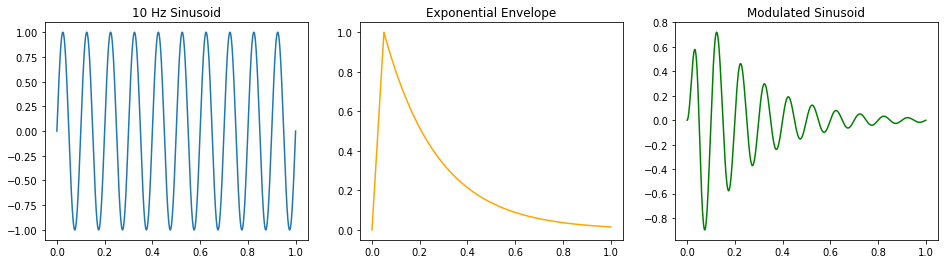

In [57]:
def expo_envelope(a_pct, rate, n):
    a_samples = int(a_pct * n)
    d_samples = n - a_samples
    a = np.linspace(0, 1, a_samples)
    d = np.exp(-rate * np.arange(d_samples))
    return np.concatenate((a, d))

# 20% attack time, 20% decay time, 35% release time; decay level of .6
t = np.linspace(0, 1, 44100)
f = 10

x = np.sin(2 * np.pi * f * t)
w = expo_envelope(.05, .0001, len(x))
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.plot(t, x)
plt.title("{} Hz Sinusoid".format(f))
plt.subplot(1, 3, 2)
plt.plot(t, w, color="orange")
plt.title("Exponential Envelope")
plt.subplot(1, 3, 3)
plt.plot(t, x * w, color="green")
plt.title("Modulated Sinusoid")
plt.show()

Try playing around with different parameters and see if you can make anything interesting. If you find any settings that generate a guitar, piano, or other instrument's sound really well, feel free to post your results on Ed so everyone else can try it out!

In [58]:
# Optionally, play around here with the adsr_envelope and expo_envelope functions,
# plus generating harmonics, to try and make something realistic sounding.

# Check out some of the references to see how you might go about doing this.

# Q2: Convolution

In the time domain, LTI systems act by convolving an input with the system's impulse response. This is why LTI systems are so nice from an analysis point of view: they are completely characterized by their impulse responses! With many real world filters and systems being LTI, convolution is naturally an important operation for us, both in exploring applications in labs and understanding theoretical underpinnings in class. Accordingly, we've devoted an entire question to helping you gain familiarity with computing convolutions.

First, we'll get a feel for what the "flip and slide" definition means visually. Then, with the fundamentals down, we'll move on to how to use library functions to do stuff, abstracting away the specifics of how convolution works.

## Q2a: Walkthrough of How Convolution Works

First, we'll run through a demo of how discrete-time convolution works. Just run the cells for this question (no coding required), but make sure you follow along and understand the steps involved.

In [59]:
# For convenience in plotting stuff
def x(n):
    return (n-2) * np.isin(n, [3,4,5])

def h(n):
    return 1/2 * np.ones(np.shape(n)) * np.isin(n, [0, 1])

Run the cell below to generate and plot the signals

$$x(n) = \delta(n-3) + 2\delta(n-4) + 3\delta(n-5), \ \ \ \ \ \ h(n) = \frac{1}{2}\delta(n) + \frac{1}{2}\delta(n-1)$$

where $x$ can be thought of as the input to an DT-LTI system with impulse response $h$.

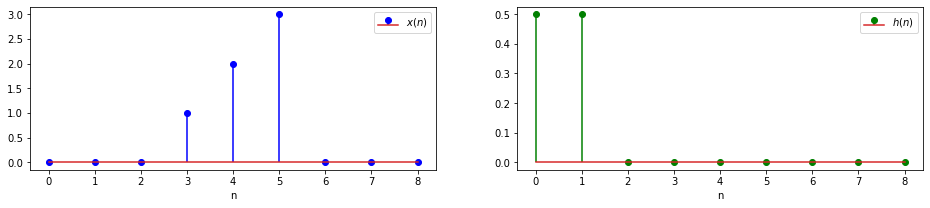

In [60]:
n = np.arange(0, 9)
plt.figure(figsize=(16, 3))
plt.subplot(1, 2, 1)
plt.stem(n, x(n), linefmt='blue', markerfmt='bo', label='$x(n)$')
plt.legend()
plt.xlabel("n")
plt.subplot(1, 2, 2)
plt.stem(n, h(n), linefmt='green', markerfmt='go', label='$h(n)$')
plt.legend()
plt.xlabel("n")
plt.show()

We want to compute $y = x * h$. This is formally defined through the infamously intimidating *convolution sum*

$$y(n) = \sum_{k=-\infty}^{\infty} x(k)h(n-k)$$

which isn't as scary as it seems. Let's walk through it one step at a time.

### Breaking Down the Definition

The easiest case to understand is when $n=0$, where we have

$$y(0) = \sum_{k=-\infty}^{\infty} x(k) h(-k)$$

which says that the output at time zero is the dot product of $x$ with a flipped version of $h$. Let's plot $x(k)$ with $h(-k)$ lined up below it.

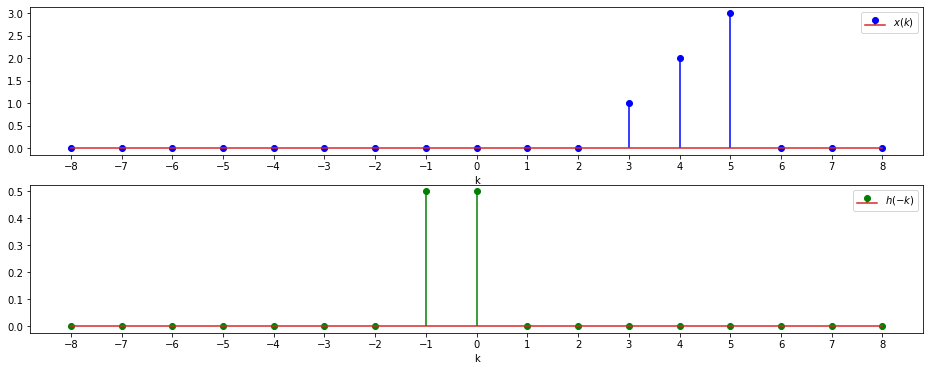

In [61]:
k = np.arange(-8, 9)
plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 1)
plt.stem(k, x(k), linefmt='blue', markerfmt='bo', label='$x(k)$')
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(k, h(-k), linefmt='green', markerfmt='go', label='$h(-k)$')
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.show()

Do you see how we left $x$ untouched, but flipped $h$? Now, to compute $y(0)$, we take the dot product of these two signals. Since they don't overlap at all as shown in the plot, we get zero as the output of the dot product, and $y(0) = 0$.

From here, we still need to compute the negative indexed entries $y(-1), y(-2), y(-3), ...$ and the positive indexed entries $y(1), y(2), y(3)$, etc. We've already flipped, so the question is: how do we slide? Let's look at the case of $y(-1)$:

$$y(-1) = \sum_{k=-\infty}^{\infty} x(k) h(-1 - k)$$

Again, we see that we take a dot product with $x$, but instead of with $h(-k)$, it's with $h(-1-k)$. Is this a shift to the left by one, or to the right by one? Well, we could cheat a bit and just plug into the code and see what happens...

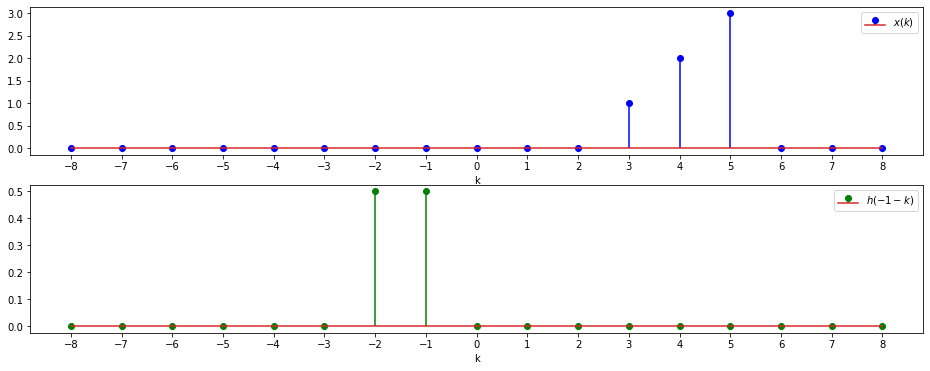

In [62]:
k = np.arange(-8, 9)
plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 1)
plt.stem(k, x(k), linefmt='blue', markerfmt='bo', label='$x(k)$')
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(k, h(-1-k), linefmt='green', markerfmt='go', label='$h(-1-k)$') # Note the "h(-1-k)" in the second argument
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.show()

It's a shift *left* by one! Why is this? To figure it out, let's define

$$\hat{h}(k) = h(-k)$$

which is the flipped signal from before. If we shift this signal to the left by one, considering $\hat{h}(k+1)$, then we get

$$\hat{h}(k+1) = h(-(k+1)) = h(-k - 1) = h(-1 - k)$$

since $\hat{h}$ simply negates its entire argument. So shifting the flipped signal left by one does indeed give us $h(-1-k)$. To compute $y(-1)$, we want the dot product of the two signals above, which again is clearly zero since they don't overlap. So $y(-1) = y(0) =0$.

What about $h(-2-k)$? Let's see.

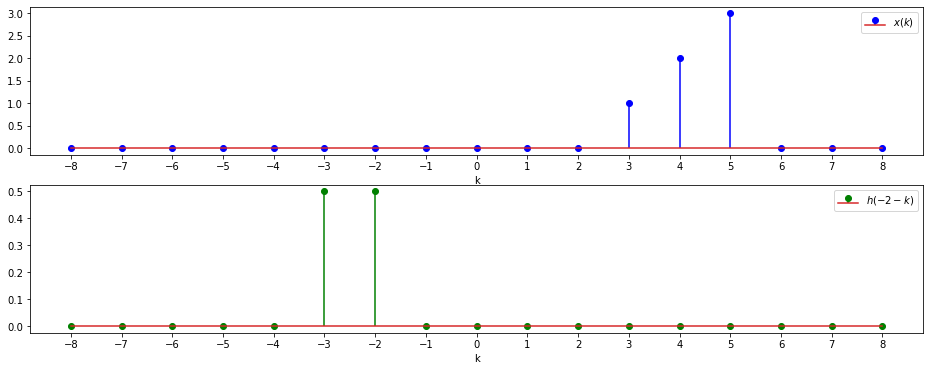

In [63]:
plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 1)
plt.stem(k, x(k), linefmt='blue', markerfmt='bo', label='$x(k)$')
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(k, h(-2-k), linefmt='green', markerfmt='go', label='$h(-2-k)$') # Note the "h(-2-k)" in the second argument
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.show()

Now, we've shifted left again, for a net shift of two time steps left from the original reveresed signal $h(-k)$. Again, there's no overlap, so the dot product is zero, and $y(-2) = 0$. Using the definition

$$\hat{h}(k) = h(-k)$$

again, note that 

$$\hat{h}(k + 2) = h(-(k+2)) = h(-2 - k)$$

which matches what we see above: shifting the flipped signal left by two corresponds to $h(-2-k)$. As we continue to find $h(-3-k), h(-4-k)$, and so on, which are dotted with $x(k)$ to compute $y(-3), y(-4)$, etc., we see that the signals move further and further apart, with $h$ moving more and more to the left! So, as $n \xrightarrow{} -\infty$, $y(n)$ will always be zero. 

So far, we've found that

$$y(0) = y(-1) = y(-2) = y(-3) = ... = 0$$

but we still need to find $y(1), y(2)$, and so on. Recall that 

$$y(1) = \sum_{k=-\infty}^{\infty} x(k) h(1 - k)$$

so we need to dot $x(k)$ with $h(1-k)$ to get the convolution output here. Just as $h(-1-k)$ corresponded to shifting the flipped signal *left* one, $h(1-k)$ shifts it *right* one:

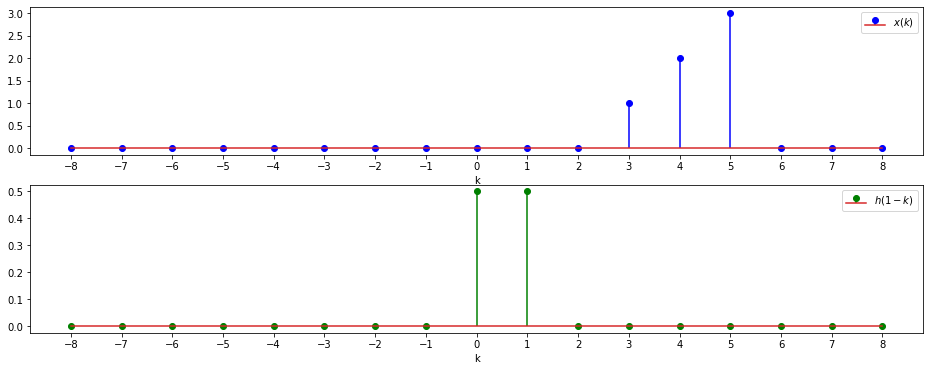

In [64]:
plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 1)
plt.stem(k, x(k), linefmt='blue', markerfmt='bo', label='$x(k)$')
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(k, h(1-k), linefmt='green', markerfmt='go', label='$h(1-k)$') # Note the "h(1-k)" in the second argument
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.show()

Still, no overlap, so we get $y(1) = 0$. We're getting closer though! What about $y(2)$, which is the dot product of $x$ with $h(2-k)$?

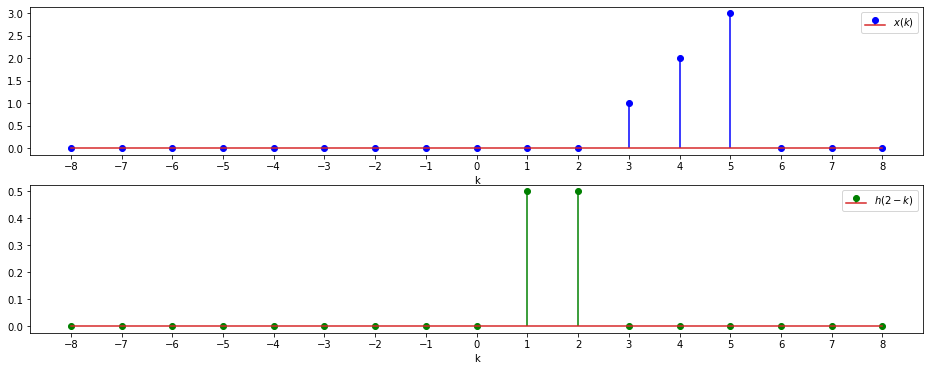

In [65]:
plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 1)
plt.stem(k, x(k), linefmt='blue', markerfmt='bo', label='$x(k)$')
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(k, h(2-k), linefmt='green', markerfmt='go', label='$h(2-k)$') # Note the "h(2-k)" in the second argument
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.show()

Again, no overlap (so $y(2) = 0$) but one more shift will do it! For $y(3)$, we consider $h(3-k)$, which is a shift right by 3 from the original $h(-k)$ (you can verify this using the "hat trick" mentioned above): 

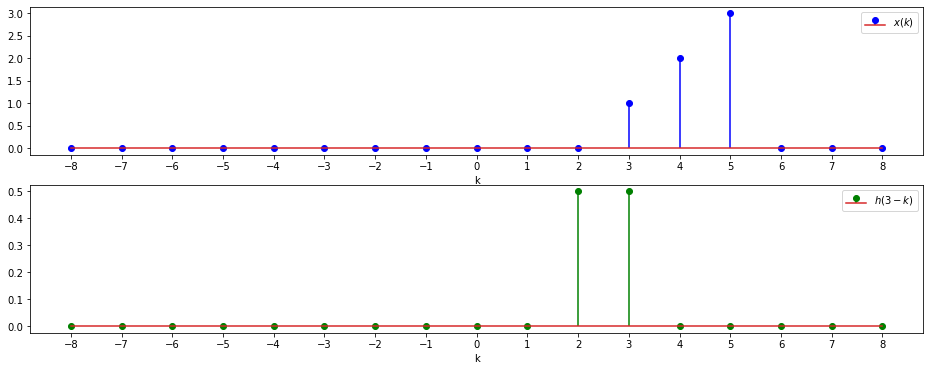

In [66]:
plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 1)
plt.stem(k, x(k), linefmt='blue', markerfmt='bo', label='$x(k)$')
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(k, h(3-k), linefmt='green', markerfmt='go', label='$h(3-k)$') # Note the "h(3-k)" in the second argument
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.show()

We finally have some overlap! At $k=3$, the flipped and shifted $h$ has value $.5$, and $x$ has value $1$. Thus, the dot product is $.5$, and we have:

$$y(3) = \sum_{k=-\infty}^{\infty} x(k)h(3-k) = \frac{1}{2}$$

Let's do the next few now! Let's plot $h(4-k), h(5-k), h(6-k)$, corresponding to the computation of $y(4), y(5), y(6)$, and $x(k)$ all together at once.

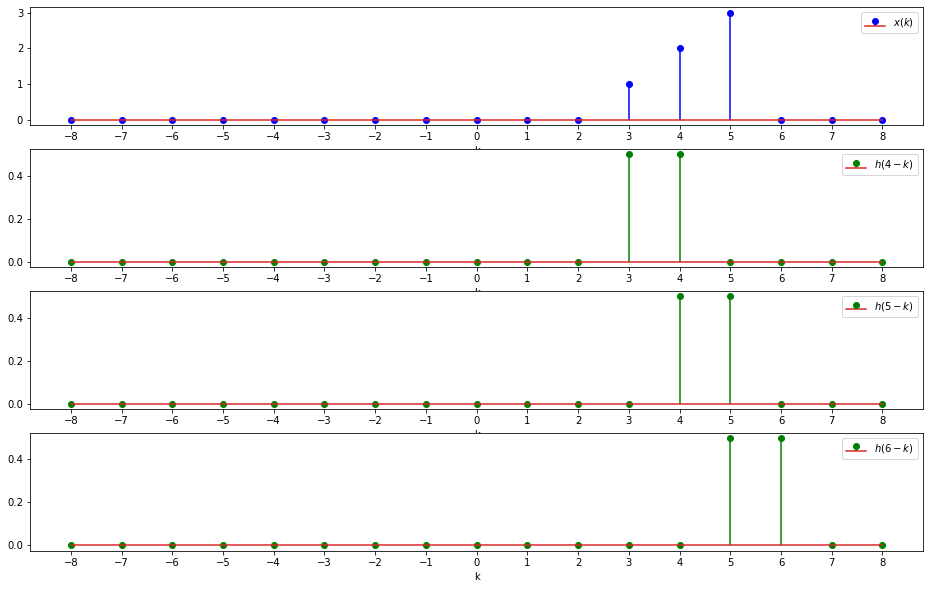

In [67]:
plt.figure(figsize=(16, 10))
plt.subplot(4, 1, 1)
plt.stem(k, x(k), linefmt='blue', markerfmt='bo', label='$x(k)$')
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.subplot(4, 1, 2)
plt.stem(k, h(4-k), linefmt='green', markerfmt='go', label='$h(4-k)$')
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.subplot(4, 1, 3)
plt.stem(k, h(5-k), linefmt='green', markerfmt='go', label='$h(5-k)$')
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.subplot(4, 1, 4)
plt.stem(k, h(6-k), linefmt='green', markerfmt='go', label='$h(6-k)$')
plt.xticks(k)
plt.xlabel("k")
plt.legend()
plt.show()

Taking the dot products, we can see that:

$$y(4) = \tfrac{1}{2} \cdot 1 + \tfrac{1}{2} \cdot 2 = \tfrac{3}{2}$$
$$y(5) = \tfrac{1}{2} \cdot 2 + \tfrac{1}{2} \cdot 3 = \tfrac{5}{2}$$
$$y(6) = \tfrac{1}{2} \cdot 3 + \tfrac{1}{2} \cdot 0 = \tfrac{3}{2}$$

As we continue to shift further to the right, there is never again overlap, so all dot products are zero! Collecting all our results together, we have that:

$$y(n) = \frac{1}{2}\delta(n-3) + \frac{3}{2}\delta(n-4) + \frac{5}{2}\delta(n-5) + \frac{3}{2}\delta(n-6)$$

which we'll plot below.

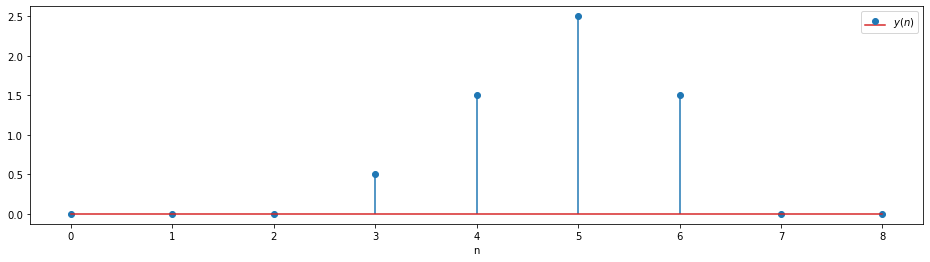

In [68]:
n = np.arange(0, 9)
y = np.array([0,0,0,1/2,3/2,5/2,3/2,0,0])
plt.figure(figsize=(16, 4))
plt.stem(n, y, label='$y(n)$')
plt.xticks(n)
plt.xlabel("n")
plt.legend()
plt.show()

On a more intuitive level, note that $h$ consisted of two adjacent lollipops, both of height $\frac{1}{2}$. We convolved it with a signal that went from 0 to 1 to 2 to 3 then back down to zero. In the output, we see that this filter had the effect of performing a *two-point moving average*: we get 1/2 (the average of 0 and 1), then 3/2 (the average of 1 and 2), 5/2 (the average of 2 and 3), then 3/2 (the average of 3 and 0) before the output is all zeros again, which are obtained by averaging the signal $x$'s zeros. 

This is the essence of discrete convolution: hold one signal fixed, flip the other and slide it over the fixed signal while taking successive dot products to produce the output. The signal we flip and slide acts as a template which we can design to produce a desired effect. Here, we got a two-point moving average, which served to smooth out the signal. In the next lab, you'll see some other filters and what effects they have on different signals.

## Q2b: Convolution with NumPy

Now, you should have some intuition for how convolution works on a conceptual level. Fortunately, in NumPy, all the hard work is handled for you.

NumPy's convolution routine is [np.convolve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html), which takes in
- `x`, a numpy array representing the signal $x$;
- `h`, a numpy array representing the signal $h$; and
- `mode`, a string specifying how to truncate the convolution, if at all

and returns $y = x * h$. 

The parameter `mode` can be used to cut out parts of the convolution output. In practice, signals are typically zero-padded with extra room, so it's okay to cut out some points without much (or any, if you pad enough zeros) loss of information.

It takes some time to get acquainted with the `mode` parameter, but it's well worth the effort. It expects one of three options: `full`, `same`, and `valid`. We'll walk through some examples that illustrate the differences.

### `mode = "full"`

NumPy computes the entire convolution, and nothing is cut out.. This mode is exactly what you've seen so far in class.

**Use case:** You don't want to crop anything.

In [69]:
np.convolve([1/2, 1/2], [1, 1, 1], 'full')

array([0.5, 1. , 1. , 0.5])

In [70]:
np.convolve([1, 2, 3], [0, 1, 0.5], 'full')

array([0. , 1. , 2.5, 4. , 1.5])

### `mode = "same"`

NumPy only keeps the "middle" part of the result. It chops off data points from each end of the output array until the result has the **same** length as the longer of the two inputs. 

**Use case:** There are many; this mode is perhaps the most popular in practice. The two main uses are:

1. For code readability, you're sticking to a convention of keeping all signals the same length through zero-padding, and you want the convolution output to also have this length.
2. To save memory, you write the convolution *output* array back into one of the input arrays. This technique is common in signal processing implementations done on embedded systems and the RaspberryPi platform where memory is limited.

In [71]:
np.convolve([1/2, 1/2], [1, 1, 1], 'same') # cropped to be of length 3; cuts out a point on the right

array([0.5, 1. , 1. ])

In [72]:
np.convolve([1, 2, 3], [0, 1, 0.5], 'same') # cropped to be of length 3; cuts out a point on each side

array([1. , 2.5, 4. ])

Note how in both cases, some of our data was cut out! When you use `same`, you have to take care to ensure no data will be cut out in the result by zero-padding both sides of one of the signals. If, for the first convolution, we instead computed

In [73]:
np.convolve([0, 1/2, 1/2, 0], [1, 1, 1], 'same')

array([0.5, 1. , 1. , 0.5])

then all of our data is intact.

### `mode = "valid"`

NumPy only keeps the part of the convolution where your signals fully overlap. This is better explained through the visual below than words.

**Use case:** Removing "fake" values at the boundaries of your output. 

For example, suppose we applied a two-point moving average filter (through convolution with `[1/2, 1/2]`) to a stock signal $x$, represented in an array as `[x[0], ..., x[N-1]]`. The first value in the output of the (`full`) convolution will be an average of `x[0]` and zero, since the filter only overlaps with the signal at one point. This average isn't meaningful, since we're including a zero (which isn't part of the stock data), so we just remove it with `valid`. This first output point, where some fake zeros were implicitly added in, is what we mean by "fake" values.

In [74]:
np.convolve([1/2, 1/2], [1, 1, 1], 'valid')

array([1., 1.])

In [75]:
np.convolve([1, 2, 3], [0, 1, 0.5], 'valid')

array([2.5])

For the second cell, since the signals have the same length, they only full overlap at one point in time, and we get only one value in our output.

### Some Visual Intuition

Below is a diagram showing you which parts of the convolution we worked through in Q2a each mode would keep. In case the examples above were unclear, we hope this clarifies things. You don't need to be able to perfectly predict what points will and won't be cut out by each mode; it's just good to know the different between "full" and "valid" since there are plenty of times in practice when you want "valid" but end up wasting time re-implementing it because you forget it exists.

<img src="figures/conv_modes_annotated.png" width=1000em />

### Final Comments on `mode` 

For the labs, we'll typically tell you what convolution mode to use to avoid any confusion. The greatest thing about the Jupyter Notebook is its interactive nature. If you're ever unsure of what parts of the output a convolution mode would chop off, just create a new cell and try it out!

### Your Job

Now that you've seen the basics of how `np.convolve` works, it's time to try it out on your own. Don't worry about defining or tracking any time indices at all (or doing any zero padding) for this question - just generate the signals and convolve as specified by the instructions.

**Make sure you use `plt.stem` for all plots in this question, so the results are displayed as DT signals.** No need to do anything fancy with your plots either (e.g. labelling axes, etc.) beyond what you're asked for - just passing the signal straight into `plt.stem` and adding whatever title the question specifies is fine.

<!-- BEGIN QUESTION -->

## Q2b(i): Get Rect

The length $L$ rectangular signal (sometimes also called the "rect" for short, or, alternatively, the "boxcar" signal) is defined as

$$r(n) = \begin{cases}1 & n = 0, 1, 2, ..., L - 1 \\ 0 & \text{otherwise}\end{cases}$$


Some alternate definitions of the rect will normalize it (so that each nonzero point of the signal has height $1/L$), and some will center it around zero (although this can only be done when $L$ is odd, so that there is a center point and an equal number of nonzero signal points on each side of $n = 0$).

Generate three plots
1. Convolve a length 3 rect with a length 3 rect and plot it. Use "full" mode. Title it "Convolution of two length 3 rects".

2. Convolve a length 10 rect with a length 10 rect and plot it, again in "full" mode. Title it "Convolution of two length 10 rects".

3. Convolve a length 50 rect with a length 50 rect and plot it, again in "full" mode. Title it "Convolution of two length 50 rects".

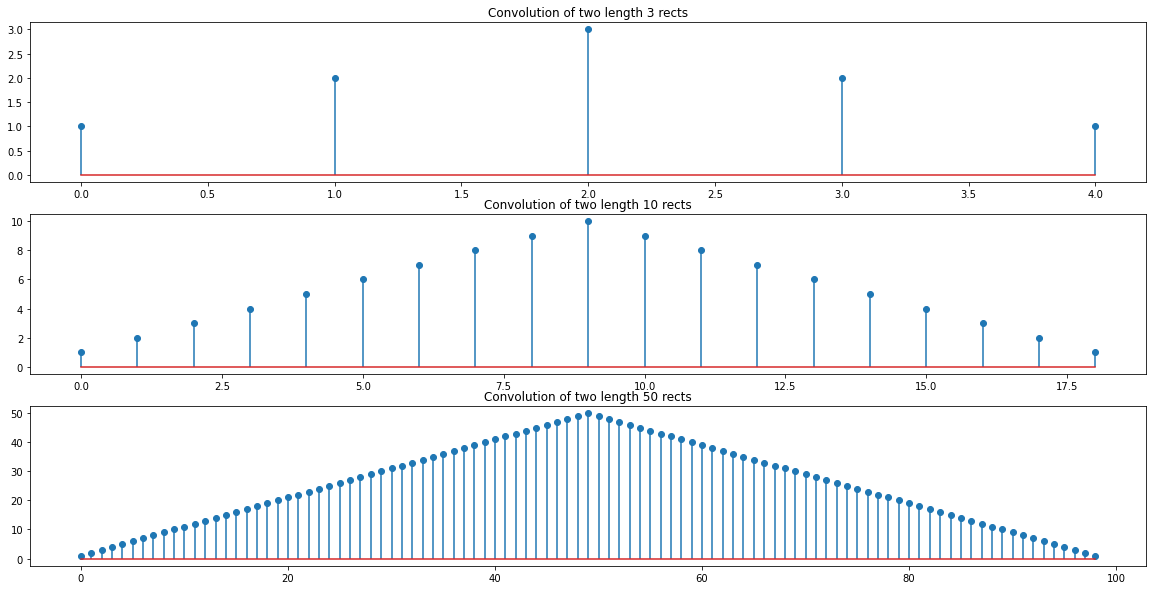

In [76]:
def rect (L):
    return np.ones(L)

plt.figure(figsize= (20,10))

plt.subplot(3,1,1)
x = np.convolve (rect (3),rect(3), "full")
plt.stem(x)
plt.title("Convolution of two length 3 rects")

plt.subplot(3,1,2)
x = np.convolve (rect (10),rect(10), "full")
plt.stem(x)
plt.title("Convolution of two length 10 rects")

plt.subplot(3,1,3)
x = np.convolve (rect (50),rect(50), "full")
plt.stem(x)
plt.title("Convolution of two length 50 rects")

plt.show()

**Q:** In general, what shape is the convolution of two rects *of the same length*? A one-word answer is fine.

**A**: A symmetrical Triangle 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q2b(ii): Get Rect Again

Now, we'll convolve rects that have *different* lengths and see what happens.

Create the following plots:
1. Convolve a length 2 rect with a length 5 rect.
2. Convolve a length 10 and length 20 rect.
3. Convolve a length 60 and length 20 rect.

**For this part, perform all convolutions in "full" mode, so you don't have to worry about signal values being cut out and can focus on the results.** As a consequence, it's perfectly fine to not zero-pad any of your signals pre-convolution. Remember, "full" mode doesn't cut anything out. For example, if you were asked to convolve a length 2 rect with a length 4 rect, it's fine to use `np.array([1, 1])` and `np.array([1, 1, 1, 1])`, respectively, as the NumPy array representations of your signals.

**For all parts of this question, plot the convolution result, and give your plot a reasonable title.**

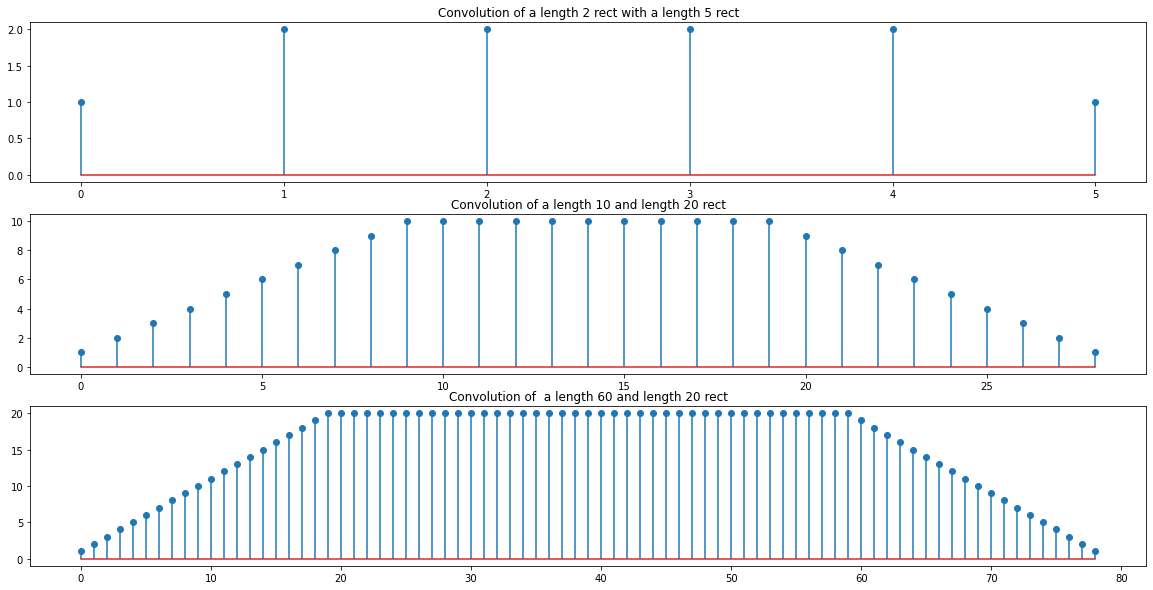

In [77]:
def rect (L):
    return np.ones(L)

plt.figure(figsize= (20,10))

plt.subplot(3,1,1)
x = np.convolve (rect (2),rect(5), "full")
plt.stem(x)
plt.title("Convolution of a length 2 rect with a length 5 rect")

plt.subplot(3,1,2)
x = np.convolve (rect (10),rect(20), "full")
plt.stem(x)
plt.title("Convolution of a length 10 and length 20 rect")

plt.subplot(3,1,3)
x = np.convolve (rect (60),rect(20), "full")
plt.stem(x)
plt.title("Convolution of  a length 60 and length 20 rect")

plt.show()

**Q:** In general, the convolution of two rects of different lengths is a trapezoid, which you should see from your plots. We'll define the *length* of the trapezoid's "top" as the number of points for which it attains its maximum value. For example, the length of a triangle's top is 1, since it peaks at one data point and slopes downward on either side of the peak. 

Which trapezoid would you expect to have a longer top: one obtained by convolving a length 10 rect and length 20 rect, or one obtained by convolving a length 15 rect and length 20 rect? Briefly explain why. 

**A**: The trapezoid of length 15 and length 20 rect would have a longer top since there are more signals that overlap creating that top of maximum value. 

<!-- END QUESTION -->

## Q2b(iii): Get Rect, The Grand Finale

We saw in Q2b(i) what happens when we convolve two rects that have the same length together. But what if we convolve 3 togther (by convolving two, then convolving the result with a third)? What about 4? 5? 10? 100? The result might surprise you. 

In doing so, to make sure the convolution results don't blow up to infinity, we'll normalize our rects to sum to 1. An interesting fact that you'll prove later in the semester is that if you convolve two signals that both sum to 1, the result also sums to 1. We'll use length two rects here, although you'll get a similar result if you use a larger size.

You don't have to write any code for this question; just run the cells.

Let's see what happens when we convolve 2, 3, and 4 rects together.

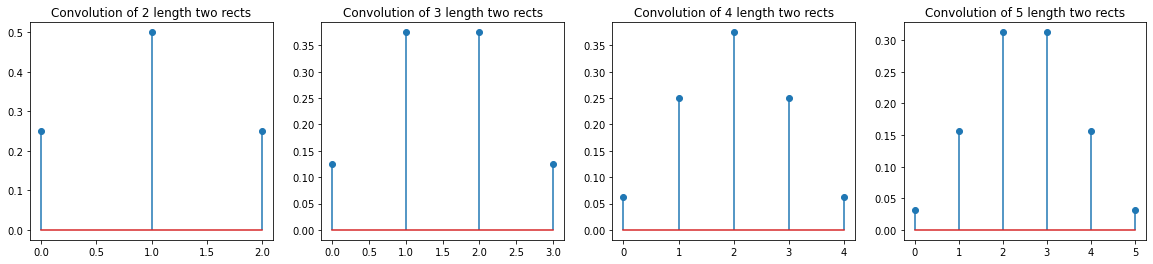

In [78]:
rect = np.array([1/2, 1/2])

plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
x = np.convolve(rect, rect, "full")
plt.stem(x)
plt.title("Convolution of 2 length two rects")

plt.subplot(1, 4, 2)
x = np.convolve(x, rect, "full")
plt.stem(x)
plt.title("Convolution of 3 length two rects")

plt.subplot(1, 4, 3)
x = np.convolve(x, rect, "full")
plt.stem(x)
plt.title("Convolution of 4 length two rects")

plt.subplot(1, 4, 4)
x = np.convolve(x, rect, "full")
plt.stem(x)
plt.title("Convolution of 5 length two rects")
plt.show()

We can see the convolution output stretching more as we go from left to right. The results still look a bit trapezoidal, but do get successively smoother. What if we keep doing this indefinitely, stretching and smoothing the rectangles out more and more? Let's find out! Run the cell below to convolve 100 rects together, displaying the result after each convolution. 

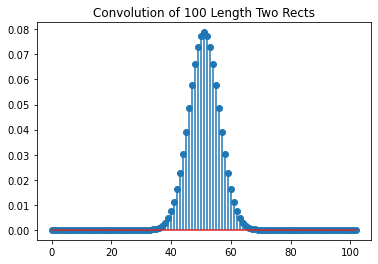

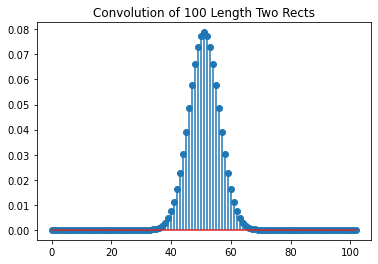

In [79]:
from IPython import display

numconv = 100 # change this to the number of convolutions you want to do
rect = np.array([1/2, 1/2])
y = np.convolve(rect, rect, "full")
for i in range(1, numconv+1):
    y = np.convolve(y, rect, "full")
    plt.clf()
    plt.stem(y)
    plt.title("Convolution of {} Length Two Rects".format(i))
    display.clear_output(wait=True)
    display.display(plt.gcf())

As we continue to convolve more and more rects together, we end up with a bell curve. Formally, this shape is known as the [Gaussian function](https://en.wikipedia.org/wiki/Gaussian_function). 

By applying a *Gaussian filter* — one with a Gaussian function as its impulse response — we are implicitly applying a large number of rectangular filters. A rectangular impulse response to corresponds to a simple moving average filter (provided it is normalized so the filter coefficients sum to 1), since it locally averages points through successive dot products. Thus, the Gaussian filter can be thought of as applying a large number of moving averages, since we keep convolving rects together. This is actually a consequence of the celebrated [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) from probability theory.

The Gaussian filter shows up in a wide variety of signal and image processing contexts for smoothing and low-pass filtering. In fact, the default method used for blurring images is to perform a (2D) convolution with a Gaussian filter, known as a [Gaussian blur](https://en.wikipedia.org/wiki/Gaussian_blur), which you'll implement in a later lab. Just about every image editing program from Adobe Photoshop to open source variants like GIMP have this feature. Now, we have a theoretical justification for using a Gaussian filter to smooth signals: it is equivalent to applying a large number of moving average filters.

# Q3: Fast Convolution

After making it through this lab, you might be wondering why you should bother with NumPy at all. You may be asking yourself, "Why can't we just use regular Python lists and the Python math libraries to do everything? They're so much simpler than dealing with NumPy."

The answer is that NumPy blows vanilla Python out of the water at scientific computing whenever speed is a factor, which it often is (who wants to wait forever for their code to run?). NumPy is your best friend for implementing complex simulations or handling large volumes of data. Anytime you find yourself writing a list comprehension or using loops to do some form of computation, build a habit of converting the code from pure Python to NumPy. It will make everything *much* faster, as you'll see here. NumPy is especially optimized for matrix and vector operations, which are ubiquitous in signal processing algorithms.

All LTI systems — which show up a lot in practical signal processing, and are a lead actor in our course — convolve an input with their impulse response to produce an output in the time domain. This makes it a great case study for us to try and optimize using NumPy. Below, we've provided **working code** to perform a "full" mode convolution of two signals without using *any* NumPy functionality. It works by reversing one of the signals and doing a series of sliding dot products, just as you've learned. 

In [80]:
"""DO NOT EDIT THIS CELL OR YOU WILL RECEIVE ZERO POINTS ON THIS QUESTION"""
def numpyless_conv(x, y):  
    # Create output array
    N = len(x) + len(y) - 1 # Convolving a duration D signal and a duration K signal gives a duration D+K-1 signal
    out = [0 for i in range(N)]
    
    # Pad for ease of implementation
    y_rev = y[::-1]
    zeros_x = [0 for i in range(N - len(x))]
    zeros_y = [0 for i in range(N - len(y))]
    x_pad = zeros_x + list(x)
    y_rev_pad = list(y_rev) + zeros_y
    for n in range(N):
        # This loop computes the dot product
        for i in range(N):
            out[n] += x_pad[i] * y_rev_pad[i]
        y_rev_pad = [y_rev_pad[i] for i in range(-1, N-1)] # Circularly shift everything one to the right
    return out

Your job in this question is simple: implement the function `numpy_conv` in the next cell to perform a "full" mode convolution of the signals `x` and `y`, which will be passed in as numpy arrays. Because we've already given you working code, there are a two requirements:
1. Your function must pass all provided test cases below to ensure it's outputting the correct results. Unless this is true, you will automatically get zero points on this question since we've given you working code that passes them.
2. Your function must be at least 10x faster than `numpyless_conv` for credit.

This question is all or nothing; your solution must satisfy both requirements for credit. For reference, the staff solution is ~20-40x faster (depending on what laptop it's run on) and only makes basic modifications to `numpyless_conv`.

**You may not use any NumPy or SciPy functions that automatically perform Fourier Transforms, correlations, or convolutions, as they defeat the entire purpose of this exercise.** However, everything else in NumPy and SciPy is fair game. For example, you're welcome to use `np.dot`, the numpy function that performs dot products and matrix-vector multiplications. If you're unsure about whether or not a function is allowed, just ask on Ed.

**Hint:** NumPy is highly optimized for matrix and vector operations. Think about how you could implement convolution in terms of these. You're welcome to start by copying the `numpyless_conv` code and modifying whatever you see fit.

_Type your answer here, replacing this text._

In [104]:
def numpy_conv(x, y):
  
    M = len(x)
    N = len(y)

    # pad sequences with zeros to ensure proper output size
    padded_x = np.concatenate((np.zeros(N - 1), x, np.zeros(N - 1)))
    padded_y = np.flip(y)

    # create output array and fill it with convolved values
    out = np.zeros(M + N - 1)
    for n in range(M + N - 1):
        out[n] = np.sum(padded_x[n:n+N] * padded_y)

    return out


Run the cell below to test your function out. For credit, the output should show at least a 10x speedup.

In case you're curious, the speedup tests compare the average time taken, over 10 trials, by each function to compute the convolution of two randomly-generated (i.e., dense) length 500 signals.

In [105]:
lab1_helper.get_speedup(numpy_conv, numpyless_conv)

Without NumPy: 0.2508 sec
With NumPy:    0.0048 sec
NumPy gives a 52.6057x speedup


In [106]:
grader.check("q3")

q3 results: All test cases passed!

### How good does it get?

The `numpyless_conv` function is a vanilla Python implementation of convolution. It's very slow because it fails to leverage the awesome power of NumPy and SciPy. 

At the other end of the spectrum, we have `np.convolve`, numpy's state-of-the-art version. It's a great exercise to write your own convolution function, which is why we made you do it here. However, you should always use library implementations when they exist, since they have already been debugged and optimized for efficiency. 

As a final experiment in your first EE 120 lab, let's see how much better NumPy's built-in function is than the non-numpy version you were given.

In [84]:
lab1_helper.get_speedup(np.convolve, numpyless_conv) # This will take a few seconds to run

Without NumPy: 0.2631 sec
With NumPy:    0.0001 sec
NumPy gives a 1941.9365x speedup


The results are unequivocal: NumPy is the winner! We hope you're convinced that learning the ins and outs of NumPy, SciPy and Matplotlib through the labs this semester will add a valuable tool to your skillset.

# References
[1] The official Python 3 language documentation. [Link](https://docs.python.org/3/).  
[2] The official numpy and scipy documentation. [Link](https://docs.scipy.org/doc/).  
[3] The official matplotlib documentation. [Link](https://matplotlib.org/contents.html).    
[4] *Computer Music in Undergraduate Digital Signal Processing.* [Link](http://www.ece.nmsu.edu/~pdeleon/Research/Publications/ASEE_GSW_2000.pdf).  
[5] *Hammer nonlinearity, dynamics and the piano sound.* [Link](https://www.acs.psu.edu/drussell/Piano/Dynamics.html)  
[6] *ADSR_parameter.svg (Wikipedia)*. [Link](https://commons.wikimedia.org/wiki/File:ADSR_parameter.svg)

## Other Sources
- Question 1 was adapted from a question from Lab 1 of the Fall 2011 offering of Princeton University's Signals and Systems course, ELE 301, which can be found at https://www.princeton.edu/~cuff/ele301/labs.html. The question was originally implemented in Matlab but ported to Python with some modifications, and we thank the ELE 301 teaching staff at Princeton for providing a great starting point for that question.  
- Question 3 was inspired by a question on using NumPy to perform a Monte Carlo estimation of $\pi$ from Lab 1 of the Fall 2018 offering of our very own Probability and Random Processes course, EECS 126, available at https://inst.eecs.berkeley.edu/~ee126/fa18/#labs.
- Credit for the labelled piano layout image goes to Piano-Keyboard-Guide.com.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Please upload the zip file produced by the result of this command to Gradescope.

In [87]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...

Your submission received the following results when run against available test cases:

    q1a results: All test cases passed!

    q1b results: All test cases passed!

    q3 results:
        q3 - 1 result:
            Trying:
                sig = [1]
            Expecting nothing
            ok
            Trying:
                true, actual = np.convolve(sig, sig, "full"), numpy_conv(sig, sig)
            Expecting nothing
            ok
            Trying:
                assert len(true) == len(actual)
            Expecting nothing
            **********************************************************************
            Line 4, in q3 0
            Failed example:
                assert len(true) == len(actual)
            Exception raised:
                Traceback (most recent call last):
                  File "/srv/conda/envs/notebook/lib/python3.9/doctest.py", line 1334, in __run
                    exec(compile(examp